In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import folium

# read file
df = pd.read_csv("AB_NYC_2019.csv")
display(df)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


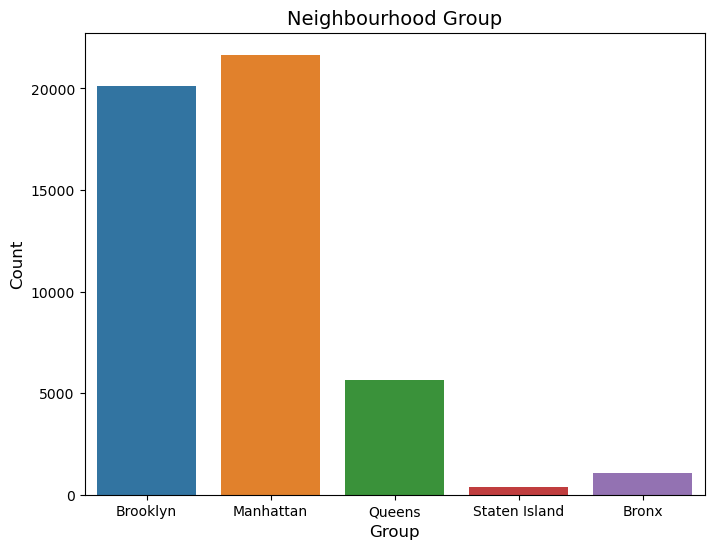

In [2]:
#1. vẽ biểu đồ cột cho neighborhood group

plt.figure(figsize=(8, 6)) # tạo kích thước hình ảnh width = 8, height = 6
sns.countplot(x="neighbourhood_group", data=df) # trục x là neighborhood_group
plt.title("Neighbourhood Group", fontsize=14)
plt.xlabel("Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

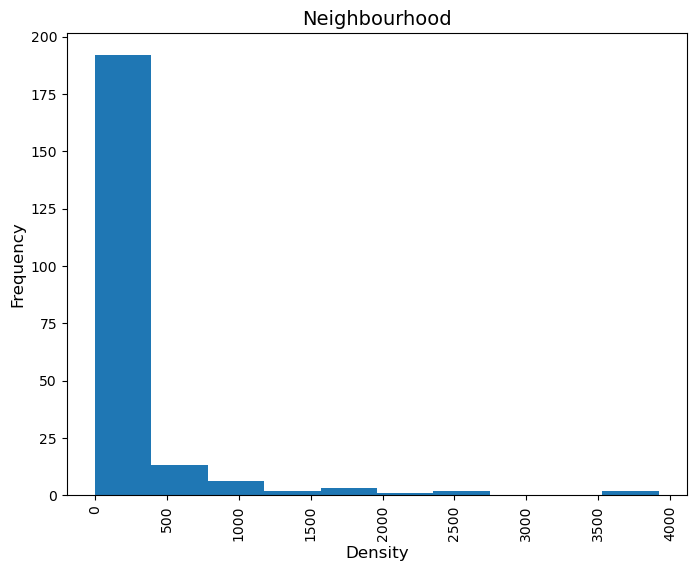

In [3]:
#2. tạo histogram cho neighbourhood

grouped = df.groupby(df['neighbourhood']).size().reset_index(name='x')
plt.figure(figsize=(8, 6))
plt.hist(grouped["x"], bins=10) #chỉ định số lượng bin được sử dụng để phân bố các giá trị
plt.title("Neighbourhood", fontsize=14)
plt.xlabel("Density", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=90) #Xoay các nhãn trục hoành đi 90 độ
plt.show()

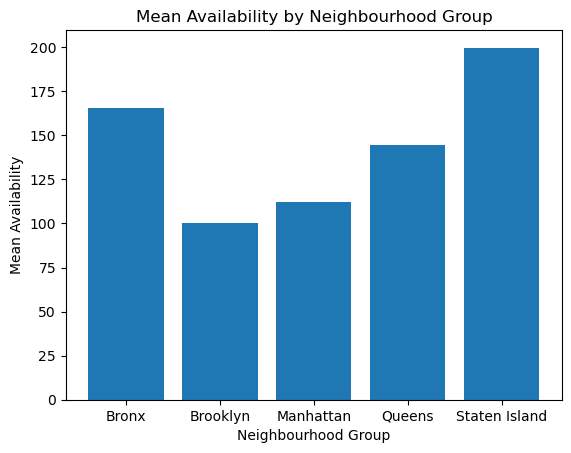

In [4]:
#3. Biểu diễn mối liên hệ giữa neighbourgroup và Availability của các phòng

# Group data by neighbourhood_group and calculate the mean availability for each group
grouped = df.groupby("neighbourhood_group")["availability_365"].mean().reset_index(name="mean_availability")

# Plot the data as a bar chart
plt.bar(grouped["neighbourhood_group"], grouped["mean_availability"])
plt.xlabel("Neighbourhood Group")
plt.ylabel("Mean Availability")
plt.title("Mean Availability by Neighbourhood Group")
plt.show()

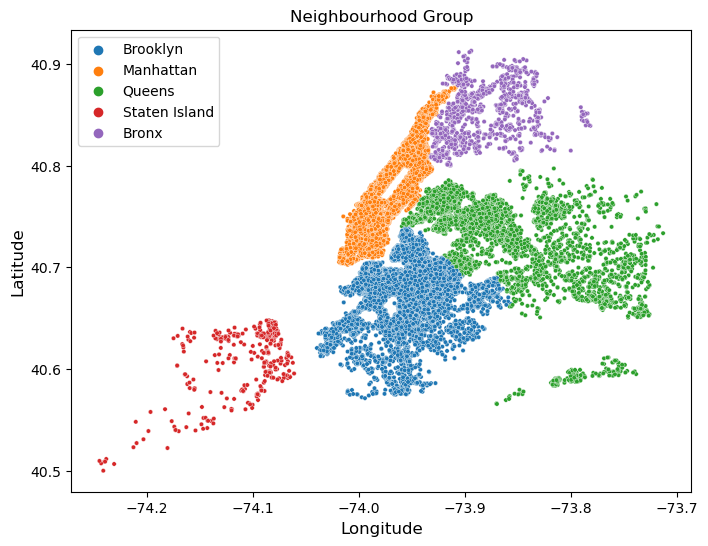

In [5]:
#4. Vẽ bản đồ (scatter plot) của neighborhood dựa theo tọa độ lat lon

# sns.scatterplot(x = 'longitude', y = 'latitude', data = df, hue = 'neighbourhood', s = 100)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='longitude', y='latitude',hue='neighbourhood_group', data=df, s=10)

plt.title('Neighbourhood Group')
#plt.legend(title="Neighborhood", loc="lower left")
plt.ylabel('Latitude', fontsize = 12)
plt.xlabel('Longitude', fontsize = 12)
plt.legend()
plt.show()

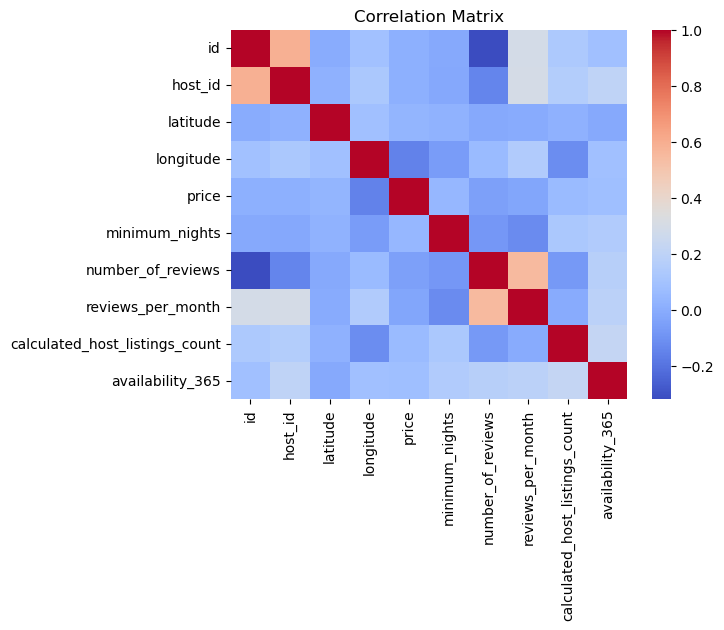

In [6]:
#5. Sử dụng heatmap để biểu diễn mối quan hệ (correlation) giữa tất cả các thuộc tính trong dữ liệu

# tính ma trận tương quan(correlation matrix) giữa tất cả các thuộc tính trong DataFrame
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap="coolwarm") 
# annot=True: sử dụng chữ số để hiển thị giá trị tương quan trên từng ô của heatmap
# cmap="coolwarm": màu xanh đại diện cho giá trị tương quan âm và màu đỏ đại diện cho giá trị tương quan dương

plt.title("Correlation Matrix")
plt.show()